By [Yulandy Chiu](https://www.youtube.com/@YulandySpace)

Aided with Gemini/Claude/ChatGPT and modified by Yulandy Chiu

Version: 2024/06

Videos:
* [[10分鐘搞懂機器學習] 7.5 決策樹的不穩定性 小變動和隨機性可能大幅改變決策樹的結構 Decision tree Instability](https://youtu.be/atfjjgH0tJo)

Facebook: [Yulandy Chiu的AI資訊站](https://www.facebook.com/yulandychiu)

 This code is licensed under the Creative Commons Attribution-NonCommercial 4.0
 International License (CC BY-NC 4.0). You are free to use, modify, and share this code for non-commercial purposes, provided you give appropriate credit. For more details, see the LICENSE file or visit: https://creativecommons.org/licenses/by-nc/4.0/
 © [2024] [Yulandy Chiu](https://www.youtube.com/@YulandySpace)


1.決策樹的不穩定性: 隨機性

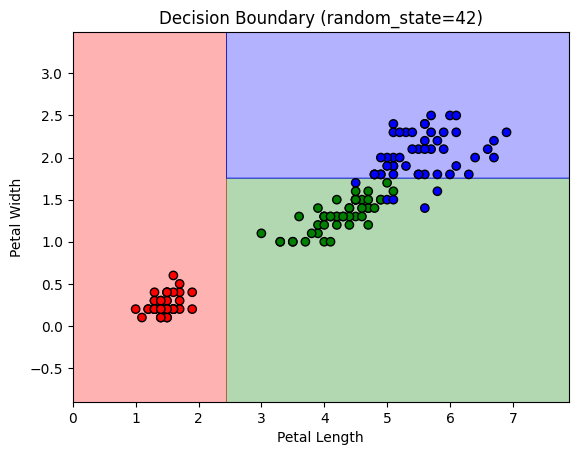

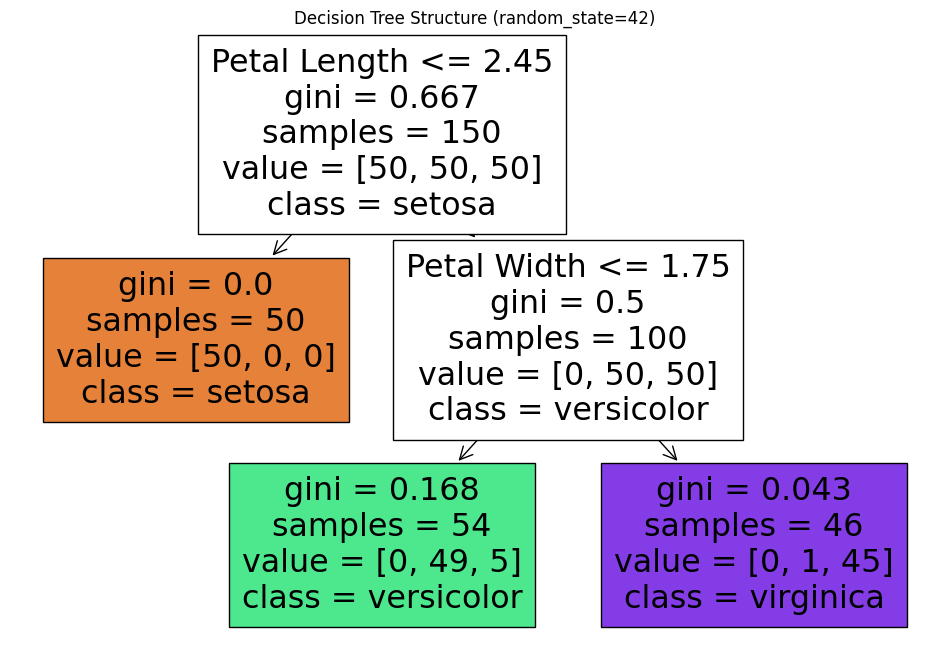

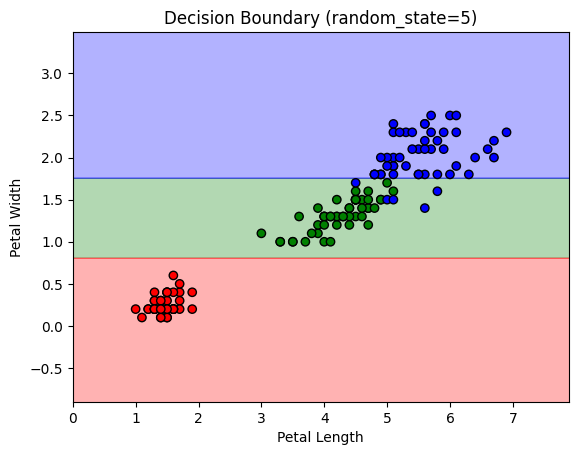

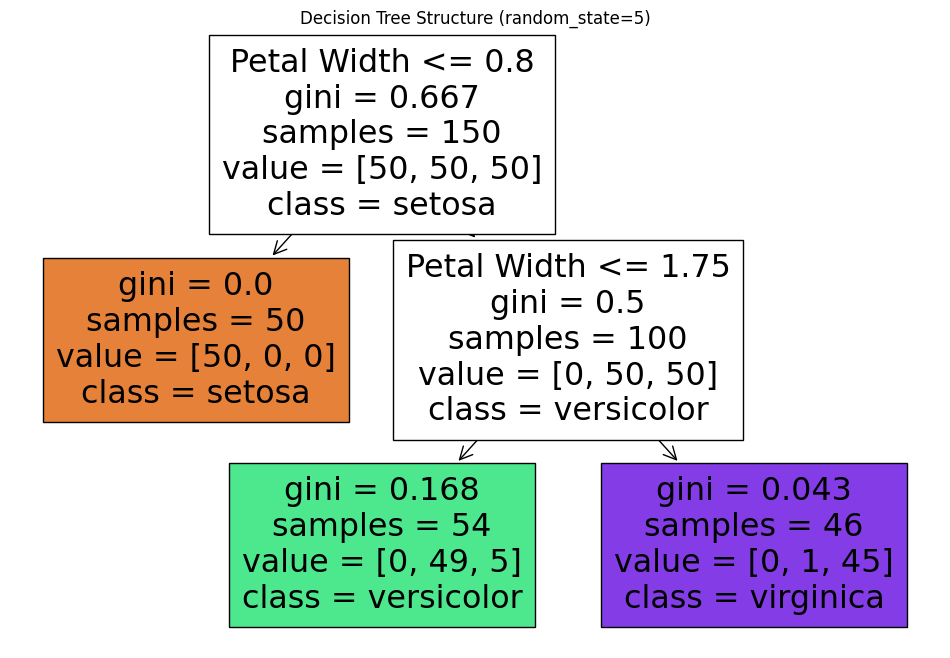

In [ ]:
# randomness
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.colors import ListedColormap

# 加载iris数据集
iris = load_iris()
X = iris.data[:, [2, 3]]  # 选择petal length和petal width
y = iris.target

# 定义绘制决策边界的函数
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=ListedColormap(('red', 'green', 'blue')))
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.title(title)
    plt.show()

# 使用random_state=42训练决策树分类器并绘制决策边界
clf_42 = DecisionTreeClassifier(max_depth=2, random_state=42)
clf_42.fit(X, y)
plot_decision_boundary(clf_42, X, y, "Decision Boundary (random_state=42)")

# 可视化决策树结构
plt.figure(figsize=(12, 8))
plot_tree(clf_42, filled=True, feature_names=['Petal Length', 'Petal Width'], class_names=iris.target_names)
plt.title("Decision Tree Structure (random_state=42)")
plt.show()

# 使用random_state=5训练决策树分类器并绘制决策边界
clf_5 = DecisionTreeClassifier(max_depth=2, random_state=5)
clf_5.fit(X, y)
plot_decision_boundary(clf_5, X, y, "Decision Boundary (random_state=5)")

# 可视化决策树结构
plt.figure(figsize=(12, 8))
plot_tree(clf_5, filled=True, feature_names=['Petal Length', 'Petal Width'], class_names=iris.target_names)
plt.title("Decision Tree Structure (random_state=5)")
plt.show()


2.決策樹的不穩定性: 離群值

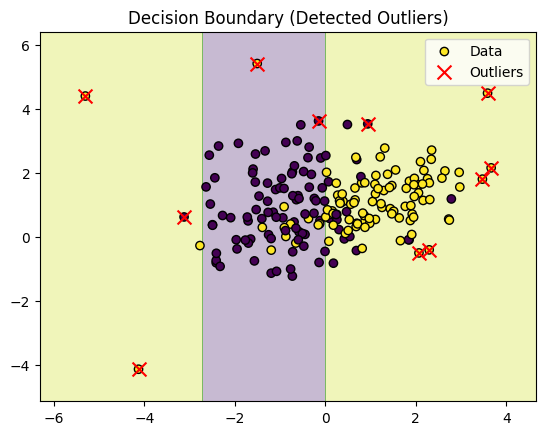

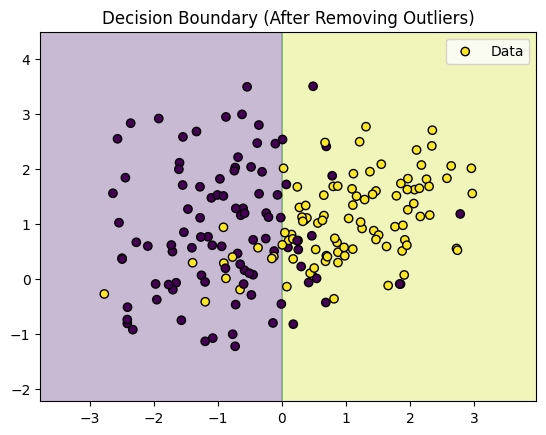

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import IsolationForest

# 生成初始数据集
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# 添加异常值
np.random.seed(42)
n_outliers = 5
X_outliers = np.random.uniform(low=-6, high=6, size=(n_outliers, 2))
y_outliers = np.random.randint(0, 2, size=n_outliers)
X_with_outliers = np.vstack((X, X_outliers))
y_with_outliers = np.hstack((y, y_outliers))

# 训练决策树分类器并绘制决策边界
def plot_decision_boundary(clf, X, y, outliers=None, title=""):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', label='Data')

    # 标示出异常值
    if outliers is not None:
        plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', s=100, label='Outliers')

    plt.title(title)
    plt.legend()
    plt.show()

# (1) 利用决策树针对原始数据分类，使用 IsolationForest 检测异常值
clf_with_outliers = DecisionTreeClassifier(max_depth=2, random_state=42)
clf_with_outliers.fit(X_with_outliers, y_with_outliers)

# 使用 IsolationForest 检测异常值
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_labels = iso_forest.fit_predict(X_with_outliers)
detected_outliers = X_with_outliers[outlier_labels == -1]

plot_decision_boundary(clf_with_outliers, X_with_outliers, y_with_outliers, outliers=detected_outliers, title="Decision Boundary (Detected Outliers)")

# (2) 将异常值移除，再用决策树分类
X_clean = X_with_outliers[outlier_labels != -1]
y_clean = y_with_outliers[outlier_labels != -1]

clf_clean = DecisionTreeClassifier(max_depth=2, random_state=42)
clf_clean.fit(X_clean, y_clean)
plot_decision_boundary(clf_clean, X_clean, y_clean, title="Decision Boundary (After Removing Outliers)")


3.決策樹的不穩定性: 資料旋轉

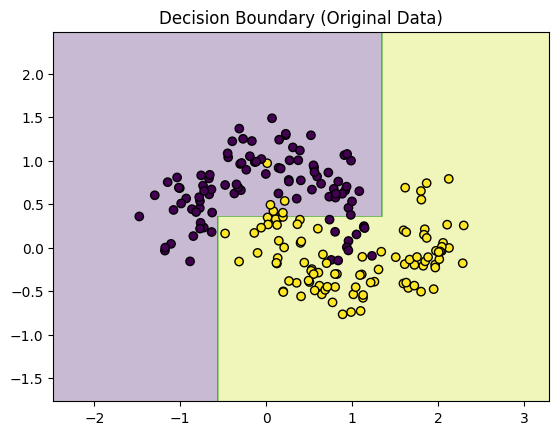

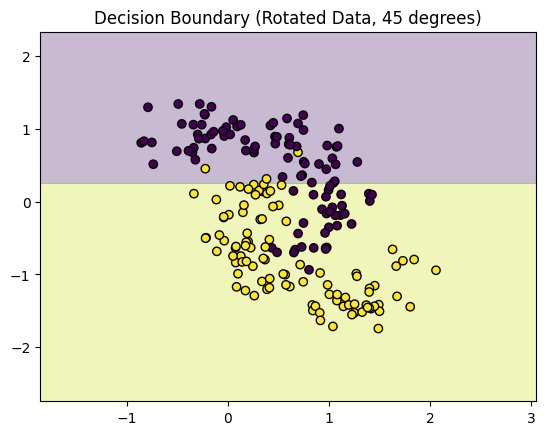

In [ ]:
# data rotation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

# 生成示例數據集
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# 定義旋轉矩陣
def rotate(X, angle):
    theta = np.deg2rad(angle)
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])
    return X.dot(rotation_matrix)

# 訓練決策樹分類器並繪製決策邊界
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

# 初始數據集
clf = DecisionTreeClassifier(random_state=42, max_depth=2)
clf.fit(X, y)
plot_decision_boundary(clf, X, y, "Decision Boundary (Original Data)")

# 旋轉數據集
angle = 45
X_rotated = rotate(X, angle)
clf_rotated = DecisionTreeClassifier(random_state=42, max_depth=2)
clf_rotated.fit(X_rotated, y)
plot_decision_boundary(clf_rotated, X_rotated, y, f"Decision Boundary (Rotated Data, {angle} degrees)")

# 比較原始數據和旋轉數據的分類準確性
y_pred_original = clf.predict(X)
y_pred_rotated = clf_rotated.predict(X_rotated)

accuracy_original = accuracy_score(y, y_pred_original)
accuracy_rotated = accuracy_score(y, y_pred_rotated)


